# DATA PREPARATION

### DATASET

The datasets used comes from here https://www.kaggle.com/datasets/grikomsn/amazon-cell-phones-reviews?select=20191226-reviews.csv

The user published two `.csv` files:
- `item.csv` contains informations about every single item scraped from Amazon, like brand, price, rating;
- `review.csv` contains the title and the body of the reviews and some other information.

Because in the second file there are reviews in other languages besides English, I used the Google Sheets function `DETECTLANGUAGE` to find the language of these texts. I saved the file in Excel `review.xslx`

### 1) IMPORTING THE DATASET

In [3]:
library(repr)

options(repr.plot.width=15, repr.plot.height=7)

In [4]:
library(readxl)
library(tidyverse)
library(scales)
library(tm)

In [5]:
d1 <- read.csv("20191226-items.csv", header = T, sep = ",", dec = ".")
d2 <- read_excel("review.xlsx")

In [6]:
head(d1)

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,price,originalPrice
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<int>,<dbl>,<dbl>
1,B0000SX2UC,,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice Activated Dialing & Bright White Backlit Screen,https://www.amazon.com/Dual-Band-Tri-Mode-Activated-Dialing-Backlit/dp/B0000SX2UC,https://m.media-amazon.com/images/I/2143EBQ210L._AC_UY218_ML3_.jpg,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0
2,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phone/dp/B0009N5L7K,https://m.media-amazon.com/images/I/419WBAVDARL._AC_UY218_ML3_.jpg,3.0,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.95,0
3,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE CELL PHONE,https://www.amazon.com/MOTOROLA-C168i-CINGULAR-PREPAID-GOPHONE/dp/B000SKTZ0S,https://m.media-amazon.com/images/I/71b+q3ydkIS._AC_UY218_ML3_.jpg,2.7,https://www.amazon.com/product-reviews/B000SKTZ0S,22,99.99,0
4,B001AO4OUC,Motorola,Motorola i335 Cell Phone Boost Mobile,https://www.amazon.com/Motorola-i335-Phone-Boost-Mobile/dp/B001AO4OUC,https://m.media-amazon.com/images/I/710UO8gdT+L._AC_UY218_ML3_.jpg,3.3,https://www.amazon.com/product-reviews/B001AO4OUC,21,0.00,0
5,B001DCJAJG,Motorola,Motorola V365 no contract cellular phone AT&T,https://www.amazon.com/Motorola-V365-contract-cellular-phone/dp/B001DCJAJG,https://m.media-amazon.com/images/I/61LYNCVrrKL._AC_UY218_ML3_.jpg,3.1,https://www.amazon.com/product-reviews/B001DCJAJG,12,149.99,0
6,B001GQ3DJM,Nokia,Nokia 1680 Black Phone (T-Mobile),https://www.amazon.com/Nokia-1680-Black-Phone-T-Mobile/dp/B001GQ3DJM,https://m.media-amazon.com/images/I/41X4VeqkFOL._AC_UY218_ML3_.jpg,2.7,https://www.amazon.com/product-reviews/B001GQ3DJM,3,0.00,0


In [7]:
head(d2)

asin,name,rating,date,verified,title,body,helpfulVotes,language
<chr>,<chr>,<dbl>,<dttm>,<lgl>,<chr>,<chr>,<dbl>,<chr>
B0000SX2UC,Janet,3,2005-10-11,FALSE,"Def not best, but not worst","I had the Samsung A600 for awhile which is absolute doo doo. You can read my review on it and detect my rage at the stupid thing. It finally died on me so I used this Nokia phone I bought in a garage sale for $1. I wonder y she sold it so cheap?... Bad: ===> I hate the menu. It takes forever to get to what you want because you have to scroll endlessly. Usually phones have numbered categories so u can simply press the # and get where you want to go. ===> It's a pain to put it on silent or vibrate. If you're in class and it rings, you have to turn it off immediately. There's no fast way to silence the damn thing. Always remember to put it on silent! I learned that the hard way. ===> It's so true about the case. It's a mission to get off and will break ur nails in the process. Also, you'll damage the case each time u try. For some reason the phone started giving me problems once I did succeed in opening it. ===> Buttons could be a bit bigger. Vibration could be stronger. Good: ===> Reception is not too shabby. I was using it in the elevator which is a remarkable feat considering my old phone would lose service by simply putting it in my pocket. ===> Compared to my old Samsung, this phone works quite well. The ring tones are loud enough to hear and the phone actually charges quickly and has great battery life. It doesn't heat up like a potatoe in the oven either during long phone convos. ===> Nice bright, large screen. ===> Cute ways to customize it. Scroll bar can be set to purple, pink, aqua, orange, etc. Overall: Okay phone. It serves its purpose but definitely pales in comparison to these new phones coming out from Sprint. Why get so so when you can get great?",1,en
B0000SX2UC,Luke Wyatt,1,2004-01-07,FALSE,Text Messaging Doesn't Work,"Due to a software issue between Nokia and Sprint this phone's text messaging capabilities don't work with Sprint's system and won't until a software patch comes out ""some time in the next few months"". You will have to spend at least 1 hour with Sprint's award winning customer service team to find someone who will admit this to you. The problem is that Nokia designed their phones so that incoming messages are retrieved quickly and then viewed ""offline"" the way most providers work. Sprint, however, likes to have people hook up to their server first and then stay connected, burning minutes while they check their inbox, compose a reply and wait for the Sprint server to respond so they can send it out. Innovation in money-making at its finest.",17,en
B0000SX2UC,Brooke,5,2003-12-30,FALSE,Love This Phone,"This is a great, reliable phone. I also purchased this phone after my samsung A460 died. The menu is easily comprehendable and speed dialing is available for around 300 numbers. Voice dialing is also a nice feature, but it takes longer than speed dialing. The only thing that bothers me is the games...Nokia seems to have taken snake (1 and 2) off their phones. There is a skydiving game, bowling, and tennis (like pong). The ringers are very nice, and a feature is available to choose a different ringer for each person calling. However, ringtones are not available online to download to this phone. You're pretty much stuck with what you have. There are vibrating ringtones and regular (midi) polyphonic tones. All they need are covers in a reasonable price range...",5,en
B0000SX2UC,amy m. teague,3,2004-03-18,FALSE,"Love the Phone, BUT...!","I love the phone and all, because I really did need one, but I didn't expect the price of the bill when I received one. Also, I've had my phone for a little over two months now and still have yet to receive my free accessories that were supposed to come with the phone. Every time I call the company, they keep telling me to wait a couple of weeks, and that I should be receiving it shortl

### 2) PREPROCESSINS AND DATA CLEANING

Now, i merge the two datasets based on asin, and i remove the columns that are not useful for the analysis

In [8]:
d3 <- merge(d2,d1, by = "asin")

In [9]:
colnames(d3)

[1] "asin"          "name"          "rating.x"      "date"         
 [5] "verified"      "title.x"       "body"          "helpfulVotes" 
 [9] "language"      "brand"         "title.y"       "url"          
[13] "image"         "rating.y"      "reviewUrl"     "totalReviews" 
[17] "price"         "originalPrice"

In [10]:
d3[1,]

,asin,name,rating.x,date,verified,title.x,body,helpfulVotes,language,brand,title.y,url,image,rating.y,reviewUrl,totalReviews,price,originalPrice
,<chr>,<chr>,<dbl>,<dttm>,<lgl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<int>,<dbl>,<dbl>
1,B0000SX2UC,Janet,3,2005-10-11,FALSE,"Def not best, but not worst","I had the Samsung A600 for awhile which is absolute doo doo. You can read my review on it and detect my rage at the stupid thing. It finally died on me so I used this Nokia phone I bought in a garage sale for $1. I wonder y she sold it so cheap?... Bad: ===> I hate the menu. It takes forever to get to what you want because you have to scroll endlessly. Usually phones have numbered categories so u can simply press the # and get where you want to go. ===> It's a pain to put it on silent or vibrate. If you're in class and it rings, you have to turn it off immediately. There's no fast way to silence the damn thing. Always remember to put it on silent! I learned that the hard way. ===> It's so true about the case. It's a mission to get off and will break ur nails in the process. Also, you'll damage the case each time u try. For some reason the phone started giving me problems once I did succeed in opening it. ===> Buttons could be a bit bigger. Vibration could be stronger. Good: ===> Reception is not too shabby. I was using it in the elevator which is a remarkable feat considering my old phone would lose service by simply putting it in my pocket. ===> Compared to my old Samsung, this phone works quite well. The ring tones are loud enough to hear and the phone actually charges quickly and has great battery life. It doesn't heat up like a potatoe in the oven either during long phone convos. ===> Nice bright, large screen. ===> Cute ways to customize it. Scroll bar can be set to purple, pink, aqua, orange, etc. Overall: Okay phone. It serves its purpose but definitely pales in comparison to these new phones coming out from Sprint. Why get so so when you can get great?",1,en,,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice Activated Dialing & Bright White Backlit Screen,https://www.amazon.com/Dual-Band-Tri-Mode-Activated-Dialing-Backlit/dp/B0000SX2UC,https://m.media-amazon.com/images/I/2143EBQ210L._AC_UY218_ML3_.jpg,3,https://www.amazon.com/product-reviews/B0000SX2UC,14,0,0


In [11]:
colnames(d3)

[1] "asin"          "name"          "rating.x"      "date"         
 [5] "verified"      "title.x"       "body"          "helpfulVotes" 
 [9] "language"      "brand"         "title.y"       "url"          
[13] "image"         "rating.y"      "reviewUrl"     "totalReviews" 
[17] "price"         "originalPrice"

I remove duplicate columns (rating.y), Original Price and the url of the reviews (url, image, reviewUrl).
<br>Note that Title.y is the name of the product, so it's not exclued.

In [12]:
d3<- d3[,-c(12:15)]
d3<-d3[,-14]

In [13]:
dim(d3)

[1] 67986    13

In total, I have 67,986 observation, with 13 variables.

#### a) FILTER THE LANGUAGE

One problem here is that we have different languages in our review. This may create some difficulties later, when using Text Analysis techniques, so I decide to remove all the reviews that are not in English. Furthermore, 94% of the observations are in English, so we should not experiment a huge loss of information.

In [14]:
round(table(d3$language)/nrow(d3)*100,2)


#VALUE!      af      ar      bg      bn      ca      cs      cy      da      de 
   0.02    0.00    0.00    0.00    0.00    0.01    0.00    0.00    0.01    0.00 
      e      el      en      es      eu     fil      fr      fy      ga      gd 
   0.00    0.00   94.01    5.13    0.00    0.01    0.02    0.00    0.00    0.00 
     gl      gu      ha     haw      hi      hr      ht      hu      id      ig 
   0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00 
     is      it      ja      kn      la      lb      mg      mn      ms      nl 
   0.00    0.00    0.00    0.00    0.03    0.01    0.00    0.00    0.01    0.01 
     ny      pl      pt      ro      ru      so      sq      su      sv      sw 
   0.01    0.00    0.33    0.13    0.00    0.00    0.00    0.00    0.01    0.00 
     te      tr     und      vi      zh      zu 
   0.00    0.00    0.19    0.01    0.00    0.00 

In [15]:
d3 <- d3[d3$language == "en",]
dim(d3)

[1] 63916    13

So, now the columns language is not needed anymore, so i remove it.

In [16]:
d3 <- subset(d3, select = -c(language))

In [17]:
str(d3)

'data.frame':	63916 obs. of  12 variables:
 $ asin        : chr  "B0000SX2UC" "B0000SX2UC" "B0000SX2UC" "B0000SX2UC" ...
 $ name        : chr  "Janet" "Luke Wyatt" "Brooke" "amy m. teague" ...
 $ rating.x    : num  3 1 5 3 4 4 5 4 5 3 ...
 $ date        : POSIXct, format: "2005-10-11" "2004-01-07" ...
 $ verified    : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ title.x     : chr  "Def not best, but not worst" "Text Messaging Doesn't Work" "Love This Phone" "Love the Phone, BUT...!" ...
 $ body        : chr  "I had the Samsung A600 for awhile which is absolute doo doo. You can read my review on it and detect my rage at"| __truncated__ "Due to a software issue between Nokia and Sprint this phone's text messaging capabilities don't work with Sprin"| __truncated__ "This is a great, reliable phone. I also purchased this phone after my samsung A460 died. The menu is easily com"| __truncated__ "I love the phone and all, because I really did need one, but I didn't expect the price of the 

#### b) FILTER THE YEARS

I convert the date in the right format and i consider only the reviews from 2019.

Min.      1st Qu.       Median         Mean      3rd Qu.         Max. 
"2003-11-24" "2016-12-24" "2018-08-11" "2017-12-29" "2019-07-07" "2019-12-25"

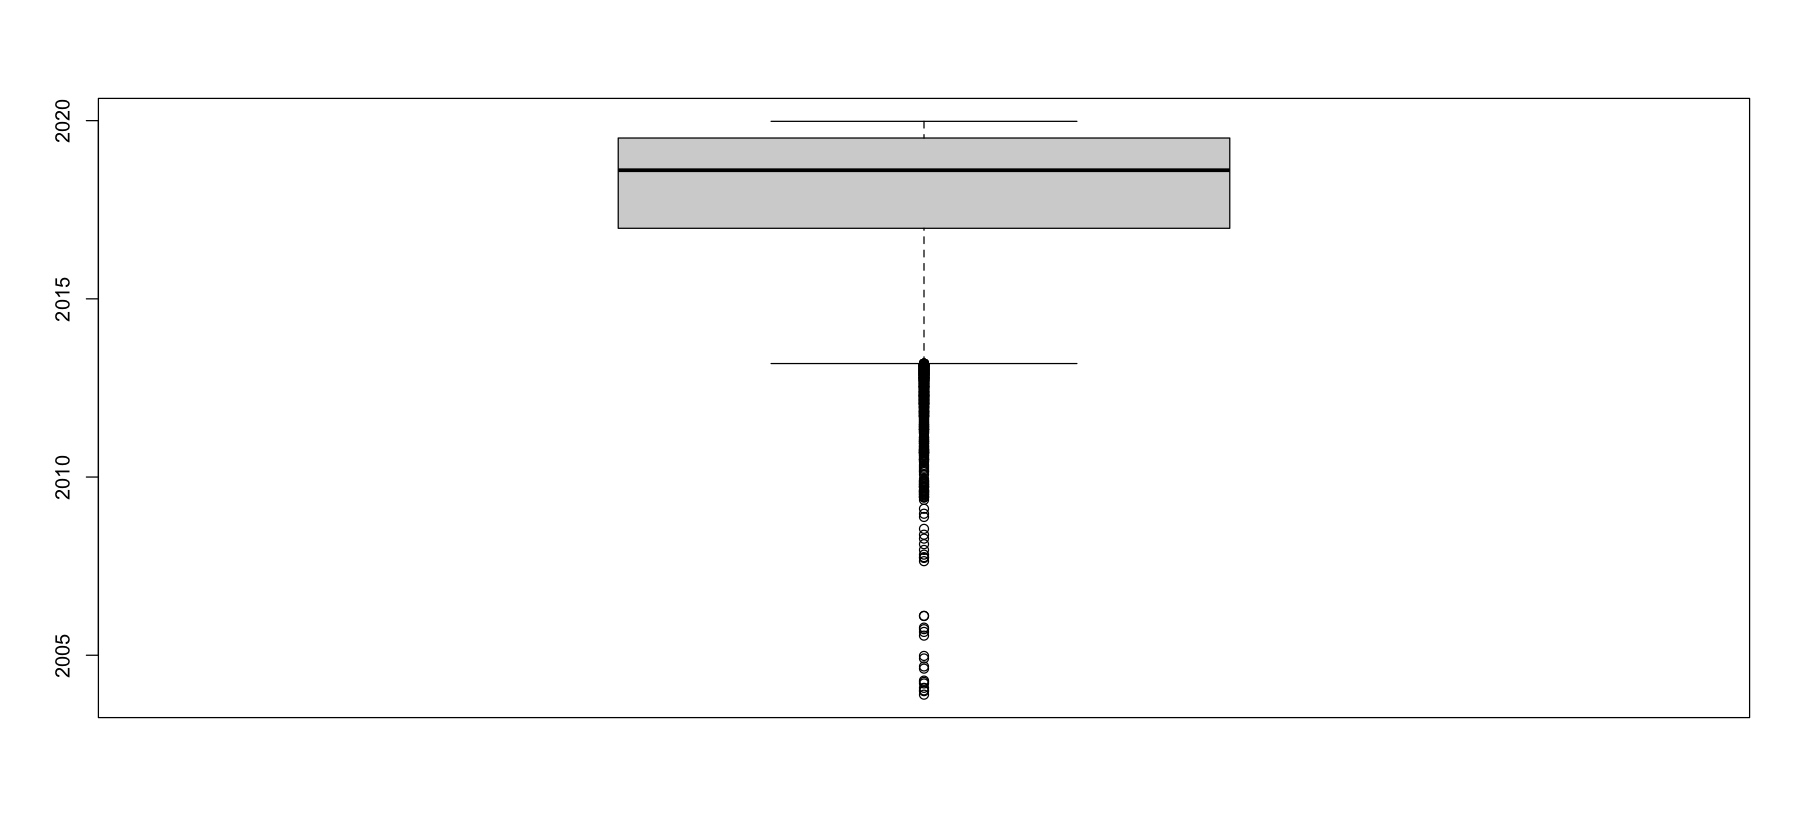

In [18]:
d3$date <- as.Date(d3$date)
summary(d3$date)
boxplot(d3$date)

In [19]:
d3$year <- format(d3$date, "%Y")

In [20]:
round((table(d3$year) / nrow(d3))*100,2)


 2003  2004  2005  2006  2007  2008  2009  2010  2011  2012  2013  2014  2015 
 0.00  0.01  0.01  0.00  0.01  0.01  0.06  0.08  0.16  1.12  3.33  5.11  6.85 
 2016  2017  2018  2019 
 8.52 12.67 20.54 41.51 

The reviews go from the end of 2003 to the end of 2019, covering a range of nearly 16 years. However, the number of reviews per year is not evenly distributed: 75% are after 2017. In addition, 41.5% of them are in 2019.

For the purpose of my analysis, I will consider only the reviews in 2019.

In [21]:
data <- d3[d3$year == 2019, ]
dim(data)

[1] 26533    13

#### c) MISSING VALUES

In [22]:
colSums(is.na(data))

asin         name     rating.x         date     verified      title.x 
           0            0            0            0            0            0 
        body helpfulVotes        brand      title.y totalReviews        price 
           0        17792            0            0            0            0 
        year 
           0

In [23]:
round(colSums(is.na(data))/nrow(data)*100,2)

asin         name     rating.x         date     verified      title.x 
        0.00         0.00         0.00         0.00         0.00         0.00 
        body helpfulVotes        brand      title.y totalReviews        price 
        0.00        67.06         0.00         0.00         0.00         0.00 
        year 
        0.00

From here we can note that only the column `helpfulVotes` has missing values. So, considering that the majority of observations (67%) does not have a defined value for this variable, I drop it.

In [24]:
data <- subset(data, select = -c(helpfulVotes))
dim(data)

[1] 26533    12

#### d) EXPORTING THE CLEAN DATASET

In conclusion, I finally obtain my dataset, that i save in a `.RData` and `.csv` file.

In [25]:
saveRDS(data, "data.RDS")

In [26]:
write.csv(data, "data.csv")

Summary of the steps taken:
- I imported the two dataset and merged them in an unique dataframe
- I removed unnecessary or duplicate columns, like rating.y, the urls, and the Original Price;
- I filtered out all the reviews that are not in English and remove the column language
- I kept only the reviews from 2019
- I check for missing values and i dropped the helpfulVotes column, which has 67% of NA values.

At the end, I obtained a dataset with 26,533 observations and 12 variables.

### 3) EXPLORATORY DATA ANALYSIS

#### a) BRAND

In [27]:
data%>%
    group_by(brand)%>%
    summarise(cnt=n())%>%
    mutate(perc=cnt/sum(cnt)*100)

brand,cnt,perc
<chr>,<int>,<dbl>
,84,0.3165869
ASUS,76,0.2864358
Apple,3526,13.2891117
Google,2207,8.3179437
HUAWEI,927,3.4937625
Motorola,3106,11.7061772
Nokia,1160,4.3719142
OnePlus,311,1.1721253
Samsung,11197,42.2002789


From here, we can see that there are 84 observations where the brand is blank. Let's see what has happened.

In [28]:
unique(data[data$brand == "", c("title.y")])

[1] "Microsoft Lumia 950 32GB Dual Sim NAM RM-1118 GSM Factory Unlocked - US Warranty (Black)"                                                                                               
[2] "ROG Phone Gaming Smartphone ZS600KL-S845-8G512G - 6” FHD+ 2160x1080 90Hz Display - Qualcomm Snapdragon 845 - 8GB RAM - 512GB Storage - LTE Unlocked Dual SIM Gaming Phone - US Warranty"
[3] "Redmi 7A 2+16Gb Black EU"

So, we have:
- Microsoft Lumia, produced by Nokia
- ROG Phone, produced by Asus
- Redmi 7A, produced by Xiaomi.

I will change the blanks with the correct brand.

In [29]:
data$brand[data$brand == "" & 
data$title.y == "Microsoft Lumia 950 32GB Dual Sim NAM RM-1118 GSM Factory Unlocked - US Warranty (Black)"] = "Nokia"

In [30]:
data$brand[data$brand == "" & 
data$title.y == "ROG Phone Gaming Smartphone ZS600KL-S845-8G512G - 6” FHD+ 2160x1080 90Hz Display - Qualcomm Snapdragon 845 - 8GB RAM - 512GB Storage - LTE Unlocked Dual SIM Gaming Phone - US Warranty"] = "ASUS"

In [31]:
data$brand[data$brand == "" & data$title.y == "Redmi 7A 2+16Gb Black EU"] = "Xiaomi"

In [32]:
brand <- data%>%
  group_by(data$brand)%>%
  summarise(cnt = n())%>%
  mutate(freq = round(cnt/ sum(cnt), 4))

In [33]:
colnames(brand)[1]<- "Brand"

In [34]:
brand

Brand,cnt,freq
<chr>,<int>,<dbl>
ASUS,141,0.0053
Apple,3526,0.1329
Google,2207,0.0832
HUAWEI,927,0.0349
Motorola,3106,0.1171
Nokia,1178,0.0444
OnePlus,311,0.0117
Samsung,11197,0.4220
Sony,720,0.0271


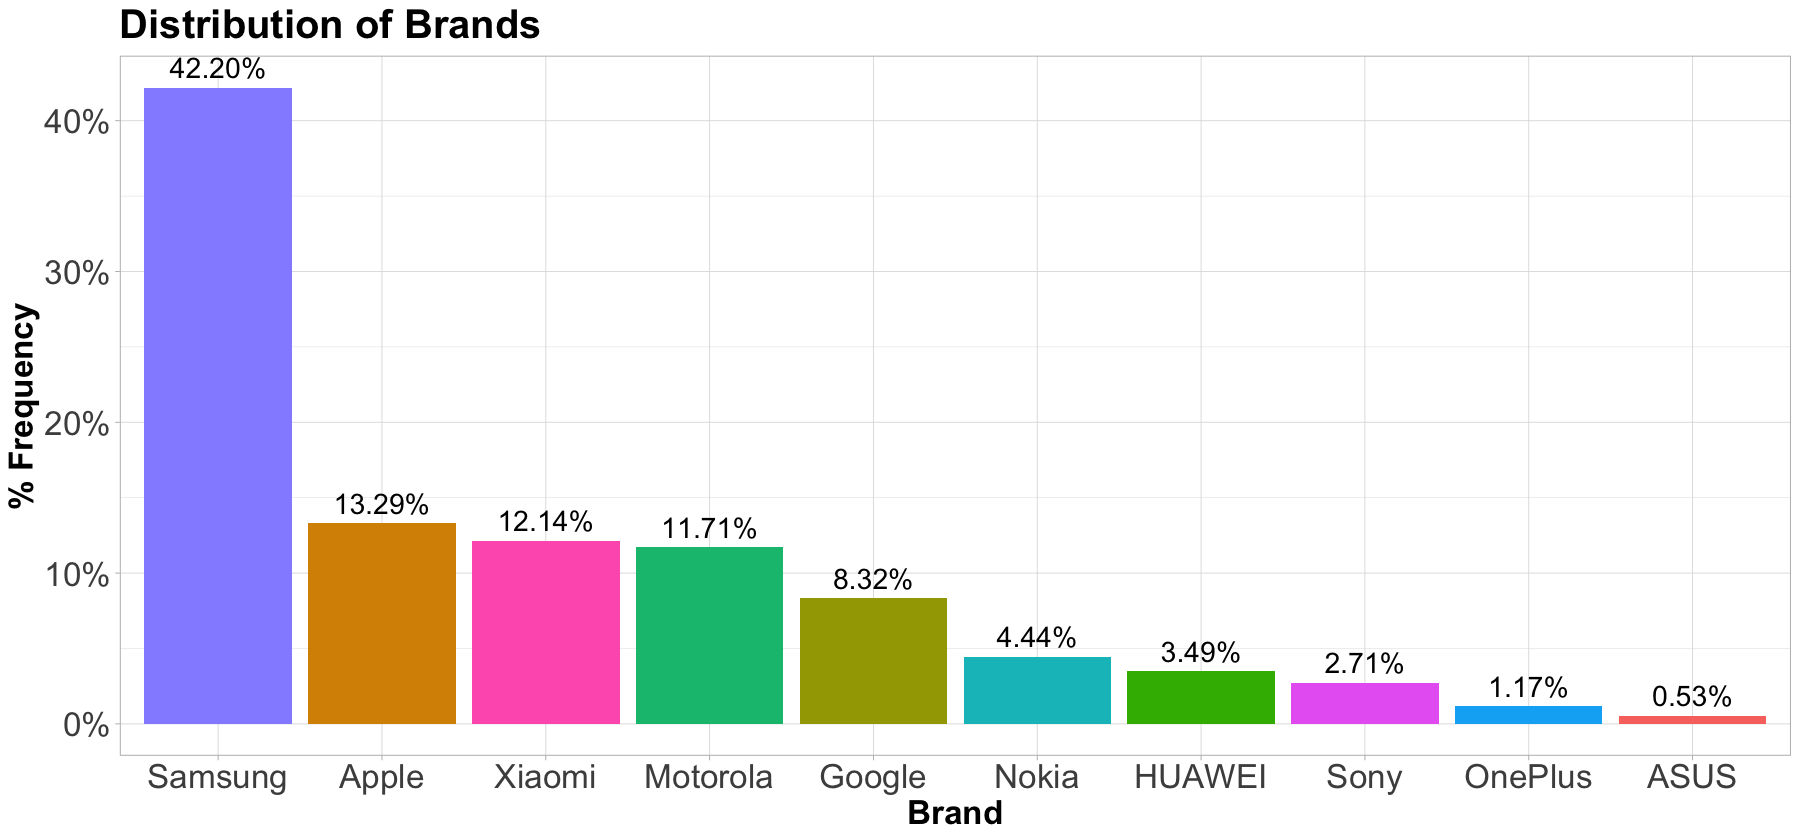

In [35]:
ggplot(brand, aes(x = reorder(Brand, -freq), y = freq, fill = Brand,label = percent(freq))) +
  geom_bar(stat = "identity")+
  ggtitle("Distribution of Brands")+
  theme_light()+
  geom_text(position = position_dodge(width = .9), vjust = -0.5, size = 6) + 
  scale_y_continuous(labels = percent)+
  xlab("Brand")+ ylab("% Frequency")+
  theme(legend.position = "None", axis.text=element_text(size=20), axis.title=element_text(size=20,face="bold"),
  plot.title = element_text(size = 24, face="bold"))

Within the dataset there are a total of nine brands: Apple, Asus, Google, Huawei, Motorola, Nokia, OnePlus, Samsung, Sony and Xiaomi. The most represented brand is Samsung, with 42.20% of the reviews in the dataset, while the least represented brands are OnePlus and Asus, with 1.17% and 0.53% of the observations, respectively.

#### b) PRODUCTS

In [36]:
products <- data%>%
  group_by(data$title.y)%>%
  summarise(cnt = n())%>%
  mutate(freq = round(cnt/sum(cnt),4))

In [37]:
colnames(products)[1] <- c("Phone")

In [38]:
products <- products [order(products$freq, decreasing = TRUE),]
products[1:10,]

Phone,cnt,freq
<chr>,<int>,<dbl>
Motorola G6 – 32 GB – Unlocked (AT&T/Sprint/T-Mobile/Verizon) – Deep Indigo - (U.S. Warranty) - PAAE0011US,565,0.0213
"Samsung Galaxy A10 32GB (A105M) 6.2"" HD+ Infinity-V 4G LTE Factory Unlocked GSM Smartphone - Black",540,0.0204
"Samsung Galaxy Note 9 Factory Unlocked Phone with 6.4"" Screen and 128GB (U.S. Warranty), Ocean Blue",520,0.0196
"Samsung Galaxy A20 US Version Factory Unlocked Cell Phone with 32GB Memory, 6.4"" Screen, [SM-A205UZKAXAA], 12 Month Samsung US Warranty, GSM & CDMA Compatible, Black",509,0.0192
Samsung Galaxy Note 8 N950 Factory Unlocked Phone 64GB Midnight Black (Renewed),508,0.0191
Samsung Galaxy A50 A505G 64GB Duos GSM Unlocked Phone w/Triple 25MP Camera - Blue,422,0.0159
Samsung Galaxy Note 8 N950U 64GB Unlocked GSM 4G LTE Android Smartphone w/Dual 12 MegaPixel Camera (Renewed) (Midnight Black),396,0.0149
"Xiaomi Redmi Note 7, 64GB/4GB RAM, 6.30'' FHD+, Snapdragon 660, Black - Unlocked Global Version",390,0.0147
Moto G7 Power - Unlocked - 64 GB - Marine Blue (No Warranty) - International Model (GSM Only),371,0.0140


The ten most frequent products in the reviews are displayed here. It is no coincidence that seven phones out of ten are made by Samsung, given the distribution of the brands.  However, it is important to note that out of just over 25,000 reviews, the most frequent product is only commented on in 2.13% of the texts. This means that in the dataset we have a lot of different phone models.

#### c) PRICE

In [39]:
summary(data$price)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0   159.5   220.0   283.7   374.9  1000.0 

In [40]:
nrow(data[data$price == 0, ])

[1] 1820

Regarding price, it varies between a minimum value of 0, which is associated with 1,820 products for which the price was not extrapolated, to a maximum of 1,000, with mean 283.7, median 220 and 75% of the observations less than 375, which represents the third quartile.

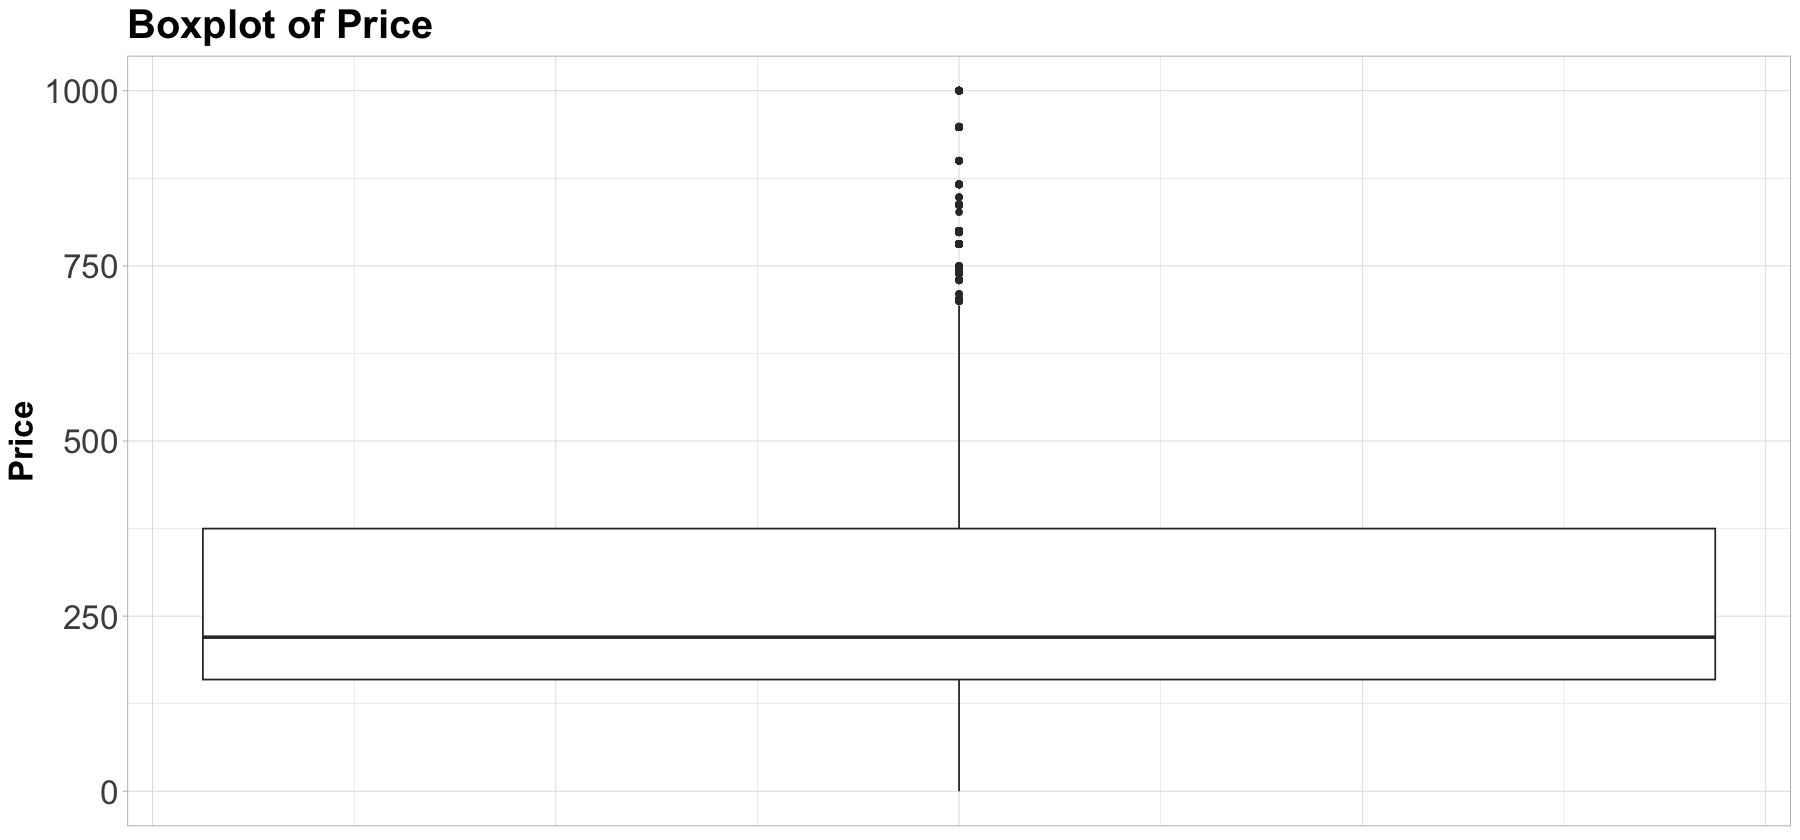

In [41]:
ggplot(data, aes(y=price))+
  geom_boxplot()+
  ggtitle("Boxplot of Price")+
  theme_light()+
  ylab("Price")+
  theme(axis.title.x=element_blank(),axis.text.x=element_blank(),axis.ticks.x=element_blank(),
  axis.text=element_text(size=20), axis.title=element_text(size=20,face="bold"), 
  plot.title = element_text(size = 24, face="bold"))

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


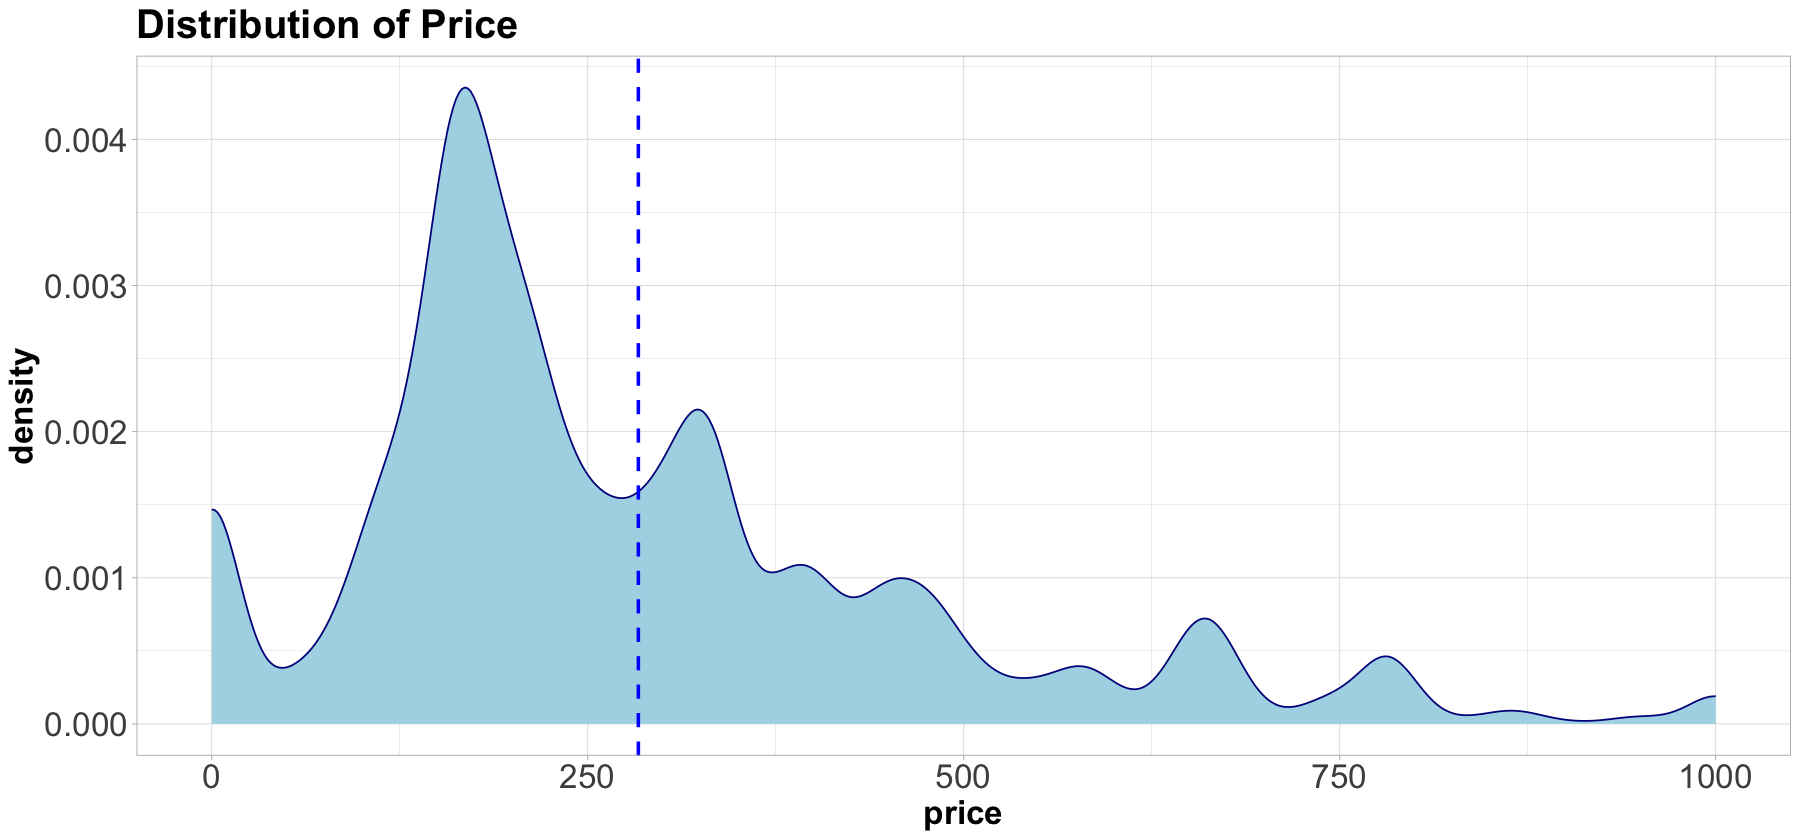

In [42]:
ggplot(data, aes(x = price))+
  geom_density(color="darkblue", fill= "lightblue")+
  theme_light()+
  geom_vline(aes(xintercept=mean(price)),
            color="blue", linetype="dashed", size=1)+
    ggtitle("Distribution of Price")+
    theme(axis.text=element_text(size=20), axis.title=element_text(size=20,face="bold"),
    plot.title = element_text(size = 24, face="bold"))

#### d) RATING

In [43]:
summary(data$rating.x)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   3.000   5.000   3.868   5.000   5.000 

In [44]:
rating <- data%>%
  group_by(data$rating.x)%>%
  summarise(cnt = n())%>%
  mutate(freq = round(cnt/ sum(cnt), 4))

colnames(rating)[1] <- "Rating"

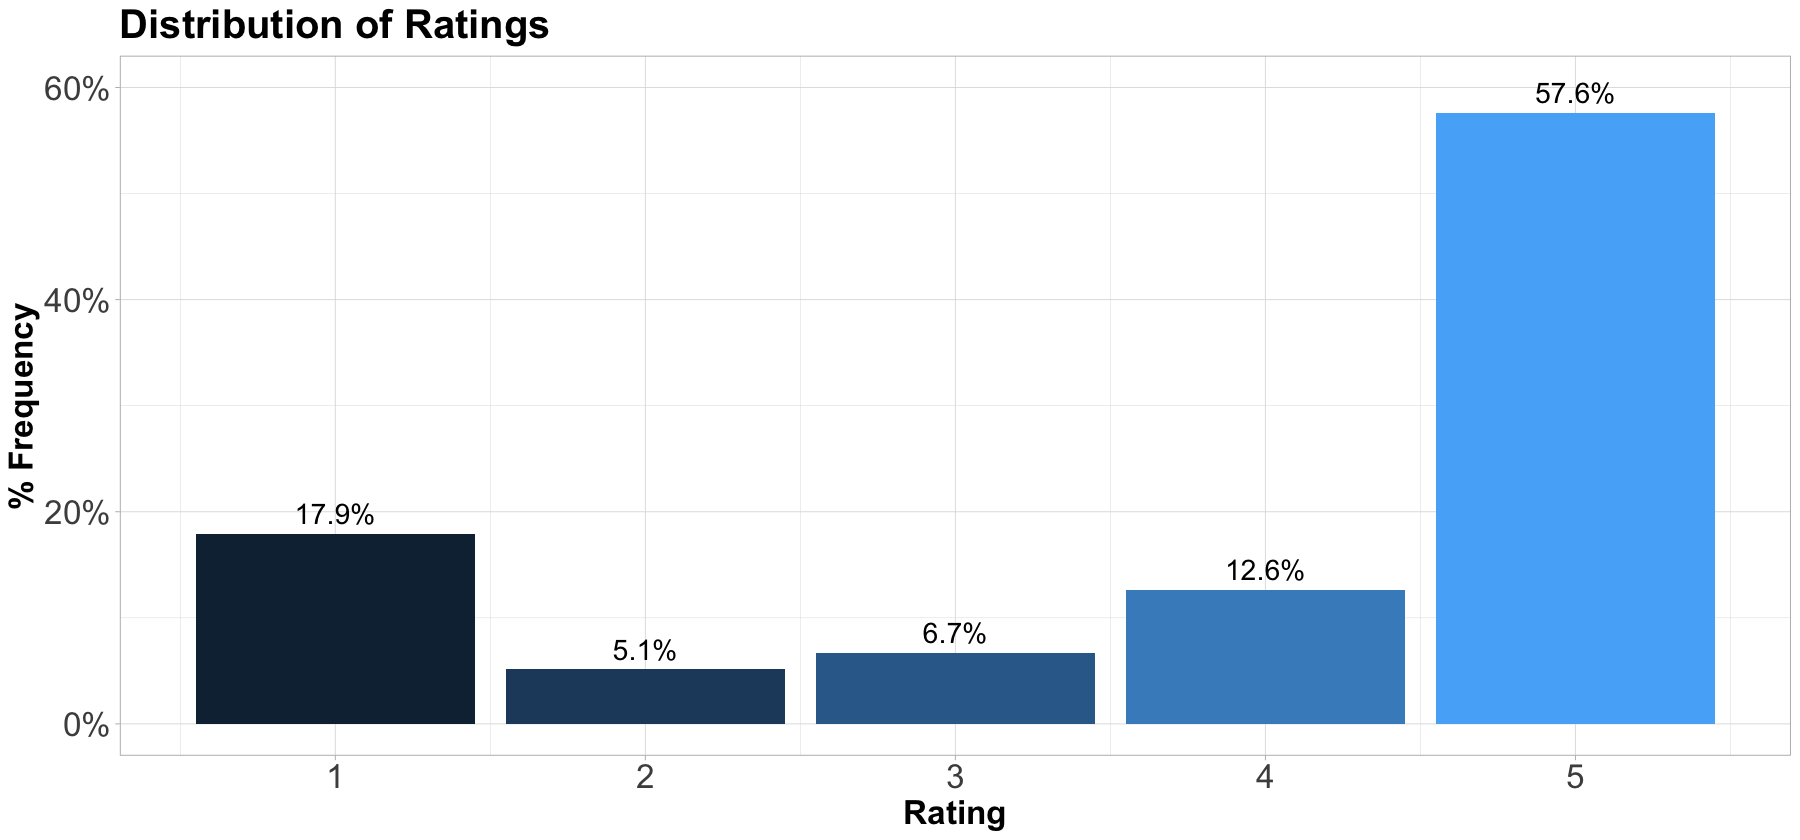

In [45]:
ggplot(rating, aes(Rating,freq, fill=Rating, label = percent(freq)))+
  geom_bar(stat = "identity")+
  theme_light()+
  geom_text(position = position_dodge(width = .9), vjust = -0.5, size = 6) + 
  scale_y_continuous(labels = percent, limits = c(0,0.6))+
  ggtitle("Distribution of Ratings")+
  xlab("Rating")+ ylab("% Frequency")+
  theme(legend.position = 'none', axis.text=element_text(size=20), axis.title=element_text(size=20,face="bold"), 
  plot.title = element_text(size = 24, face="bold"))

Lastly, the ratings expressed by users are more concentrated on the extremes, with only a few ratings between 2 and 4. In particular, 57.6% of the reviews have a maximum rating of 5, 17.9% have a minimum rating of 1 and the remaining 24.50% are in the intermediate range between 2 and 4.

### 4) TEXT PREPROCESSING AND VECTORIZATION

The typical procedure of a text analysis can be subdivided into three stages:
- pre-processing, which consists of cleaning and formatting the text until it becomes a sequence of meaningful words;
- vectorzsation, i.e. the transformation of the data from qualitative to quantitative, in order to obtain a vector or a numerical matrix that can be analysed;
- the actual analysis, which can be developed in several stages and with different techniques depending on the purposes sought.

#### a) PREPROCESSING

Pre-processing is an essential step as it allows the text to be cleaned and transformed into a set of words that can then be converted into a numerical figure. In other terms, through this procedure it is possible to simplify the structure of language, in order to transform the words into statistical units ready to be analysed.

In our case, since on Amazon the users have the possibility to write, in addition to the review, a title summarising their opinion, I decided to use as a corpus a text vector in which the title and body of the review were merged, in order to avoid the loss of potentially relevant information.

In [64]:
#keep only title and body
df1<- subset(data,select = c("title.x", "body", "brand"))

#merge them
df1 <- df1 %>% unite(titlebody, title.x, body, sep = ". ", remove = FALSE)

By looking at some reviews, there are some users that express their opinions by writining something like "one star" and "five star". These may be difficult to interpret when doing Sentiment Analysis later, and so I decided to replace "one star" with "terrible" and "five star" with "excellent".

In [47]:
review <- df1$titlebody
review <- gsub("#\\w+", " ", review, ignore.case = TRUE)
review <- gsub ("five star", "excelent", review, ignore.case = TRUE)
review <- gsub("one star", "terrible", review, ignore.case = TRUE)
review<- gsub('[^[:graph:]]', ' ', review)

In [48]:
#creation of the Corpus
reviewtext <- Corpus(VectorSource(review))

#### DIFFERENT STEPS OF PREPROCESSING

<b>- REDUCTION TO LOWER CASE</b>

Generally the way of writing does not carry additional information; therefore, everything is reduced to lower case in order to have a uniform text.

In [49]:
reviewtext <- tm_map(reviewtext, content_transformer(tolower))

Warning message in tm_map.SimpleCorpus(reviewtext, content_transformer(tolower)):
“transformation drops documents”


<b>- REMOVAL OF NUMBERS</b>

In [50]:
reviewtext <- tm_map(reviewtext, removeNumbers)

Warning message in tm_map.SimpleCorpus(reviewtext, removeNumbers):
“transformation drops documents”


<b>- REMOVAL OF PUNCTUATION</b>

In [51]:
reviewtext <- tm_map(reviewtext, removePunctuation)

Warning message in tm_map.SimpleCorpus(reviewtext, removePunctuation):
“transformation drops documents”


<b>- REMOVAL OF STOP WORDS</b>

All functional words are removed from the text, i.e. all those words with a high frequency of occurrence within the document, grammatical confusions and lacking their own meaning, such as articles, prepositions, conjunctions, auxiliary verbs, etc.

In [52]:
reviewtext <- tm_map(reviewtext, removeWords, stopwords("english"))

Warning message in tm_map.SimpleCorpus(reviewtext, removeWords, stopwords("english")):
“transformation drops documents”


<b>- STEMMING</b>

The final process in the operation of cleaning a text, stemming consists of removing the suffix of a word in order to bring it back to its root, known as stem. For example, words like do, did, done are all traced back to do.

In [53]:
reviewtext <- tm_map(reviewtext, stemDocument)

Warning message in tm_map.SimpleCorpus(reviewtext, stemDocument):
“transformation drops documents”


<b>- STRIP UNNECESSARY WHITE SPACES</b>

In [54]:
reviewtext <- tm_map(reviewtext, stripWhitespace)

Warning message in tm_map.SimpleCorpus(reviewtext, stripWhitespace):
“transformation drops documents”


#### b) VECTORIZATION

In order to analyse the stems, it is necessary to transform textual data into numerical vectors. 
<br>The simplest approach is the `Bag of Words`: given a text, this is represented as a vector of frequencies, where each word is associated with a value obtained by counting how many times the word appears in the text. The result of this operation is the creation of the Term Document Matrix (TDM).

The Bag of Words approach is defined as the simplest of the various text vectorisation techniques, as it only calculates the frequency with which words occur in the text, without any indication of their order or importance. However, not all terms are equally informative. Alternative techniques have therefore been developed, which are able to give each term a variable weight, based on a certain criterion. One such technique is the `Term Frequency - Inverse Document Frequency` vectorisation approach, commonly known by the acronym TF-IDF.

The TF-IDF weighting system assigns each term a value that is higher if the term is present many times in a few documents, while the value is lower if the word is present in many texts in the corpus. Thus, by using this method, it is possible to extract relevant words not only on the basis of frequency, which is in any case important, but also on the basis of how the words are distributed within the documents into which the corpus is divided.

In [55]:
tdm <- TermDocumentMatrix(reviewtext)
#removal of the term that appear few times
tdm <- removeSparseTerms(tdm, sparse = 0.999)
tdm_tfidf<- weightTfIdf(tdm, normalize = T)

Warning message in weightTfIdf(tdm, normalize = T):
“empty document(s): 46 110 138 305 431 803 2029 2845 3309 3467 3586 3771 3954 3998 4320 4687 5579 5617 5701 5726 6890 7627 7855 8157 8210 8251 8414 8418 8965 9025 9946 10342 10713 10779 10820 11151 12402 12466 12654 12756 12904 13098 13188 13196 13226 13300 14034 14238 14277 14339 14340 14600 15261 15622 15940 15988 16304 17468 17913 17976 18223 18653 18768 18924 19050 19374 19448 19605 19673 19746 19993 20057 20459 20478 20864 20981 21244 21381 21621 21630 22132 22536 22584 23028 23057 23696 23697 23750 23920 24040 24656 24724 24957 25654 25770 26090 26365”


In [56]:
mtdm <- as.matrix(tdm_tfidf)
#drop all empty document, the one with the colSum = 0
mtdm<- mtdm[,colSums(mtdm) > 0]

In [57]:
#frequency vectore
word_freqs <- sort(rowSums(mtdm), decreasing=TRUE)

In [58]:
#dataframe for the plot
dmtdm <- data.frame(word=names(word_freqs), freq=word_freqs, stringsAsFactors = F)

In [59]:
library(wordcloud)

Caricamento del pacchetto richiesto: RColorBrewer



Warning message in strwidth(words[i], cex = size[i], ...):
“conversione fallita da '’s' in 'mbcsToSbcs': punto sostituito per <e2>”
Warning message in strwidth(words[i], cex = size[i], ...):
“conversione fallita da '’s' in 'mbcsToSbcs': punto sostituito per <80>”
Warning message in strwidth(words[i], cex = size[i], ...):
“conversione fallita da '’s' in 'mbcsToSbcs': punto sostituito per <99>”
Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“conversione fallita da '’s' in 'mbcsToSbcs': punto sostituito per <e2>”
Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“conversione fallita da '’s' in 'mbcsToSbcs': punto sostituito per <80>”
Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“conversione fallita da '’s' in 'mbcsToSbcs': punto sostituito per <99>”
Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“metr

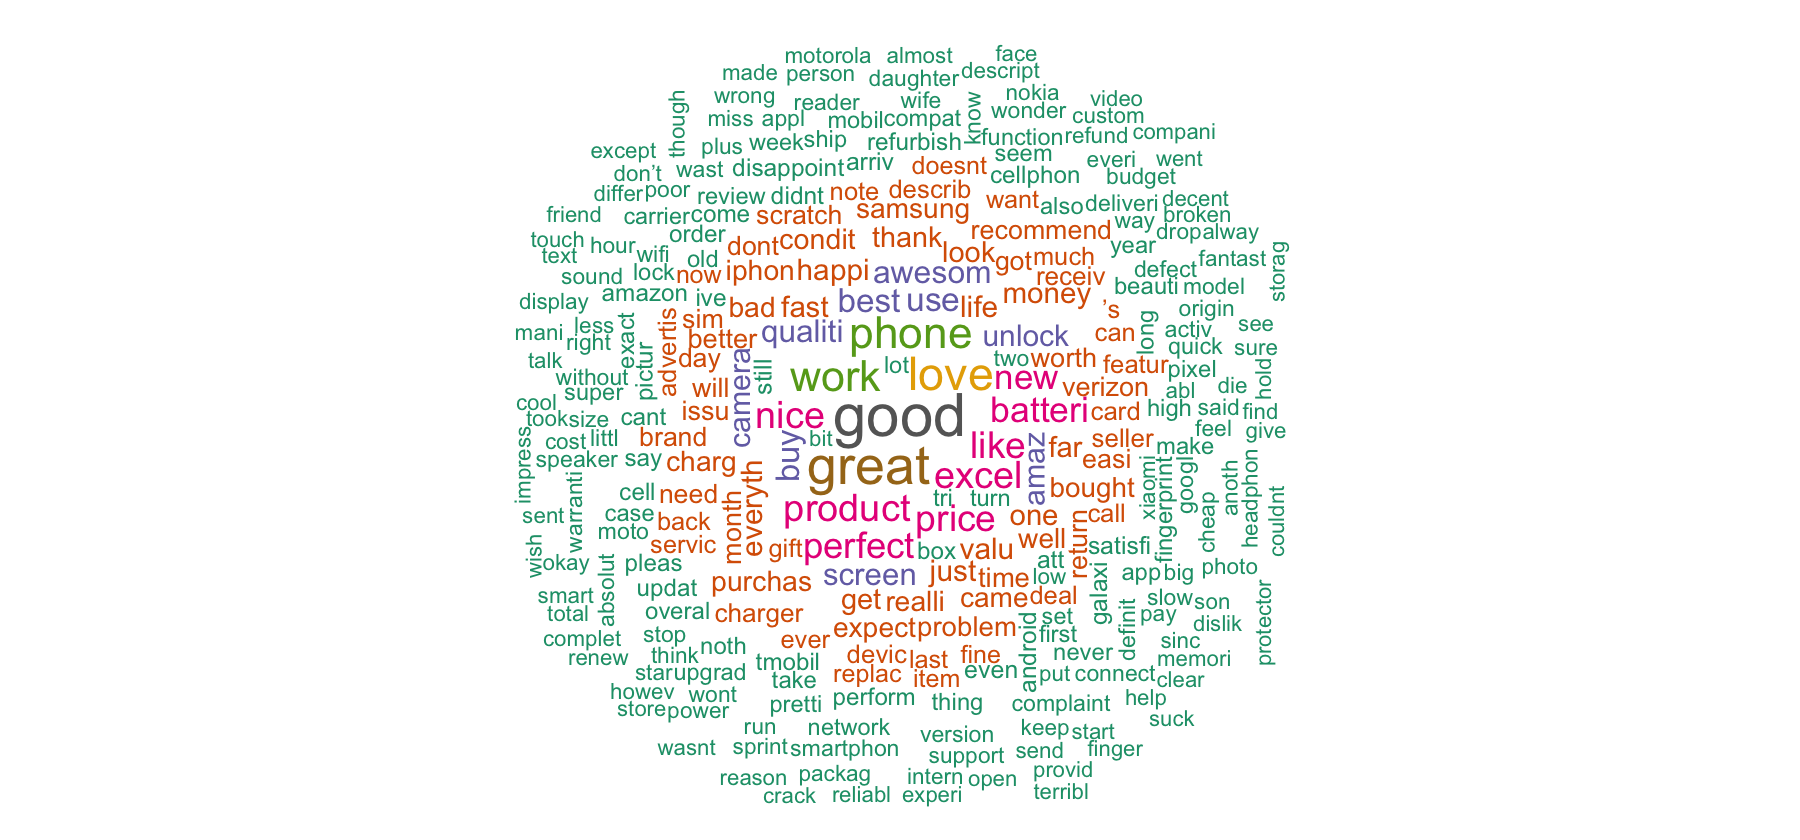

In [60]:
wordcloud(words = dmtdm$word, freq = dmtdm$freq, scale = c(3,1),
    min.freq = 100,random.order = FALSE,colors = brewer.pal(8, "Dark2"))

In [61]:
head(dmtdm, 10)

,word,freq
,<chr>,<dbl>
good,good,1966.0609
great,great,1659.5490
love,love,1310.4742
phone,phone,1197.4830
work,work,1137.1822
product,product,885.6800
excel,excel,879.4339
nice,nice,876.2570
price,price,848.6254


With the wordcloud and the table we can see the most frequent words in the corpus. The most present seems to be adjective, mostly positive.

In [62]:
saveRDS(reviewtext, "corpus.rds")

In [65]:
saveRDS(df1, "df1.rds")